# Introduction to Deep Learning: Final Project Report
## YOLOv7 Classification
**Submitted By:**

- Student:   Yaara Hoffman    ID:   206201022

- Student:   Noi Yemini       ID:   318855889

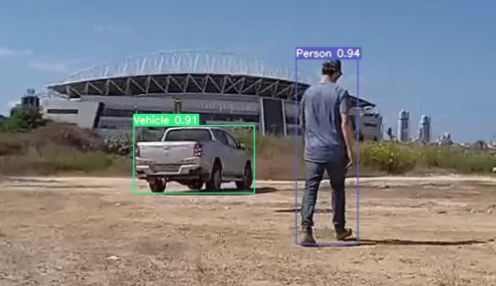

## Introduction


### What is YOLO?

YOLO (You Only Look Once) V7 is a real-time object detection model developed by Ultralytics LLC. It works by dividing the input image into a grid of cells, and for each cell, it predicts a set of bounding boxes and their corresponding class probabilities. 

The model uses a single convolutional neural network (CNN) to make these predictions, which allows it to process the entire image in one forward pass, thus achieving real-time performance. 

The architecture of YOLOv7 uses a combination of convolutional layers, max-pooling layers, and fully connected layers to extract features from the input image, and then uses these features to make predictions. 

The model also uses anchor boxes, which are pre-defined boxes of different aspect ratios and scales, to improve the accuracy of the bounding box predictions. Additionally, YOLOv7 uses a loss function that accounts for multiple factors such as classification loss, localization loss, and anchor box loss, to train the model to make more accurate predictions.

Figure 1 below gives a visual example to how this process works.

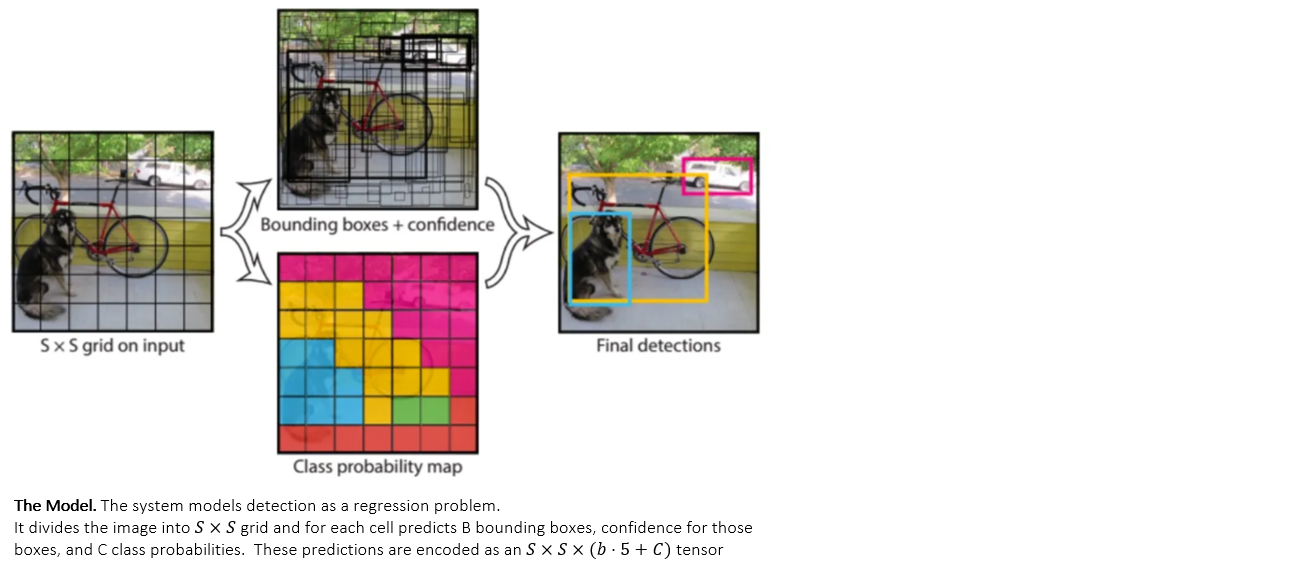

#### In this section we retrieve the YOLOV7 model:

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/gdrive')

#### And install our dependencies

In [ ]:
# Download YOLOv7 repository and install requirements

%cd /content/gdrive/MyDrive
!git clone https://github.com/augmentedstartups/yolov7.git
%cd yolov7
!pip install -r requirements.txt

In [ ]:
# run locally on gpu
!git clone https://github.com/augmentedstartups/yolov7.git
%cd yolov7
!pip install -r requirements.txt

### What are We Doing?

In this project we take part in a larger goal. As demonstrated by several researchers in the past, there are ways to trick a YOLO model into giving inaccurate results. One way to do so is by physically blocking parts of an object with a cunfusing printout, as demonstrated in this video: https://www.youtube.com/watch?v=TuiScGjsw1w&ab_channel=Mashable. 

Our final mission is to find ways to defend against attacks of this sort.

In our part, we train YOLOv7 on a given dataset of people and vehicles. Our trained model will later be tested with attacks and optional defences.

In addition to the dataset, we got elbit a pre-trained model. With this model, they were able to produce 83% detection for vehicles, and 84% detection for men. This was a bechmark we wished to surpass.


## Dataset

Our dataset, aquired and given to us by Elbit, is a classified dataset, hence we cannot grant permission to the data, and instead gave a handful of examples. The dataset contains images of poeple and vehicles:

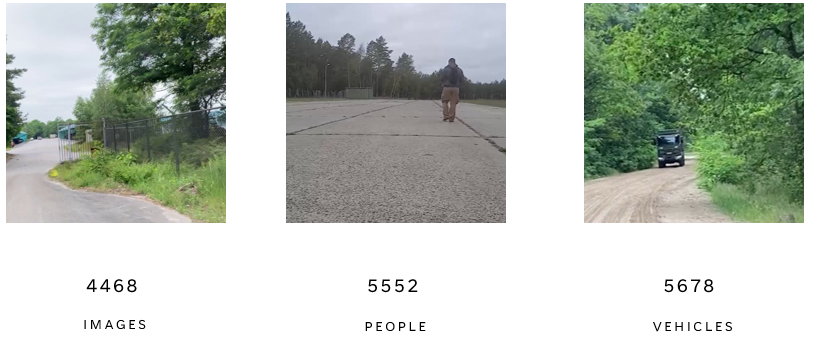

We took those images, and split 0.1 of them to Test dataset, 0.1 to a Validation dataset, and the rest (0.8) to Train dataset.

With each image we were also given a text file with the bounding boxes for each object.

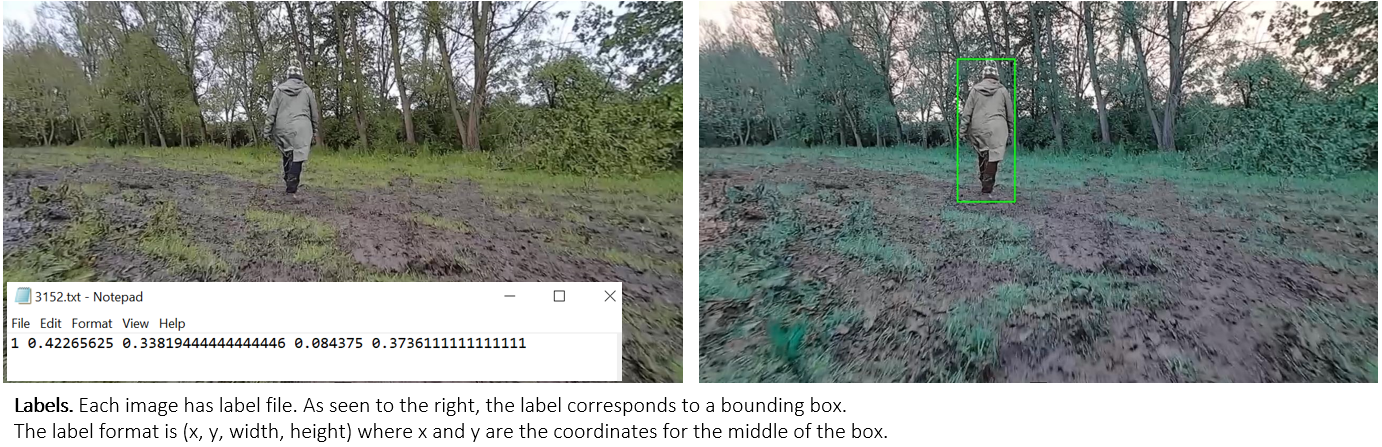

In [ ]:
## Add bounding box to an image
## We also used this code to make sure our augmentations worked properly
import cv2
import os
from PIL import Image
from numpy import asarray

source_folder_path = "C:\\Users\yhoffman\PycharmProjects\data_stats\with_aug"
filename = "3152.jpg"

x = 0.42265625
y = 0.33819444444444446
width = 0.084375
height = 0.3736111111111111
img_width = 1280
img_height = 720
start_x = (x - width / 2)*img_width
end_x = (x + width / 2)*img_width
start_y = (y - height / 2)*img_height
end_y = (y + height / 2)*img_height

start_point = (int(start_x), int(start_y))
end_point = (int(end_x), int(end_y))

jpg = Image.open(os.path.join(source_folder_path, filename))
img = asarray(jpg)

cv2.rectangle(img, start_point, end_point, color=(0, 255, 0), thickness=2)

cv2.imwrite("example_with_bounding_boxes.jpg", img)

### Data Statistics
#### We wote a script to analize the data statistics. Altogether, we were given:

-  Total number of vehicles: 5678
-  Total number of people: 5552
-  Images with one vehicle: 1479
-  Images with one person: 1280
-  Images with several vehicles: 183
-  Images with several people: 255
-  Images with both vehicles and people: 1271

#### We devided this data to training, validation and test subsets in this manner:

Train dataset:
-  Total number of vehicles: 4519
-  Total number of people: 4475
-  Images with one vehicle: 1180
-  Images with one person: 1025
-  Images with several vehicles: 145
-  Images with several people: 203
-  Images with both vehicles and people: 1021

Validate dataset:
-  Total number of vehicles: 525
-  Total number of people: 565
-  Images with one vehicle: 151
-  Images with one person: 136
-  Images with several vehicles: 16
-  Images with several people: 24
-  Images with both vehicles and people: 120

Test dataset:
-  Total number of vehicles: 634
-  Total number of people: 512
-  Images with one vehicle: 148
-  Images with one person: 119
-  Images with several vehicles: 22
-  Images with several people: 28
-  Images with both vehicles and people: 130


In [ ]:
## Code for data statistics

import os


def count_lines(folder):
    # we used the label files to count the amount of objects in each folder
    cars_count = 0
    men_count = 0
    one_man_files = 0
    one_car_files = 0
    men_files = 0
    cars_files = 0
    mixed_files = 0
    empty_files = 0

    for filename in os.listdir(folder):
        if filename.endswith(".txt"):
            with open(os.path.join(folder, filename), 'r') as f:
                # open each file and count number of objects
                men_in_file = 0
                cars_in_file = 0
                for line in f:
                    if line.startswith('0'):
                        cars_count += 1
                        cars_in_file += 1
                    elif line.startswith('1'):
                        men_count += 1
                        men_in_file += 1
                if cars_in_file == 0:
                    if men_in_file == 0:
                        empty_files += 1
                    if men_in_file == 1:
                        one_man_files += 1
                    else:
                        men_files += 1
                else:
                    if men_in_file == 0:
                        if cars_in_file == 1:
                            one_car_files += 1
                        else:
                            cars_files += 1
                    else:
                        mixed_files += 1
    # print out total number of objects
    print(f'-  Total number of vehicles: {cars_count}')
    print(f'-  Total number of people: {men_count}')
    print(f'-  Images with one vehicle: {one_car_files}')
    print(f'-  Images with one person: {one_man_files}')
    print(f'-  Images with several vehicles: {cars_files}')
    print(f'-  Images with several people: {men_files}')
    print(f'-  Images with both vehicles and people: {mixed_files}')
    print(f'-  Images neither vehicles nor people: {empty_files}')


if __name__ == '__main__':
    # Get data statistics:
    print('Train data:')
    count_lines("C:\\Users\yhoffman\PycharmProjects\data_stats\with_aug\labels\_train\labels")
    print('Validate data:')
    count_lines('C:\\Users\yhoffman\PycharmProjects\data_stats\with_aug\labels\_val')
    print('Test data:')
    count_lines('C:\\Users\yhoffman\PycharmProjects\data_stats\with_aug\labels\_test')


### Limitations & Preprocessing
#### We notice that:
- The ratios are kept in all the subsets
- There is a similar amount of people and vehicles
- There is a similar amount of images containing only people, only vehicles, and both people and vehicles

#### In addition, these statistics brought up issues that might need solving in preprocessing:
1.   Non of the images are "empty", as in containing neither people nor vehicles. This is particularly an issue given that our larger goal is to try and trick the model into thinking an image is empty. With this dataset, the model might not understand that an empty image is even possible.
2.   There are far fewer images with several people or several vehicles (seperately) than there are images with both vehicles and men. This could lead to an issue where our model labels two objects in the same image as "these must be of different types", even if the objects are of the same type.
3.   While the dataset isn't small, the YOLOv7 model is meant for video and normally takes a very high input of data. Therefore we wanted to add more images to our data, and test how the results vary.

#### Our approach:
1.   We found a dataset of natural scenery images, and added those to our dataset with empty labels. This way we had "empty" images for our training.
We added a total of 69 such images, destributed:
- 55 - train dataset
- 7  - validation dataset
- 7  - test dataset
2.   We added random white noise to a selection of images with several men, and images with several vehicles, but not images with men and vehicles together. We added those images to our data and checked if it made our results any better. We created 1000 such images and spread them evenly between our train and validation data sets.
3.   Finally, we wanted to try a larger data set. For this we used several augmentation methods:
- Cropping
- Gaussian Noise
- Blur
- Saturation
- Brightness



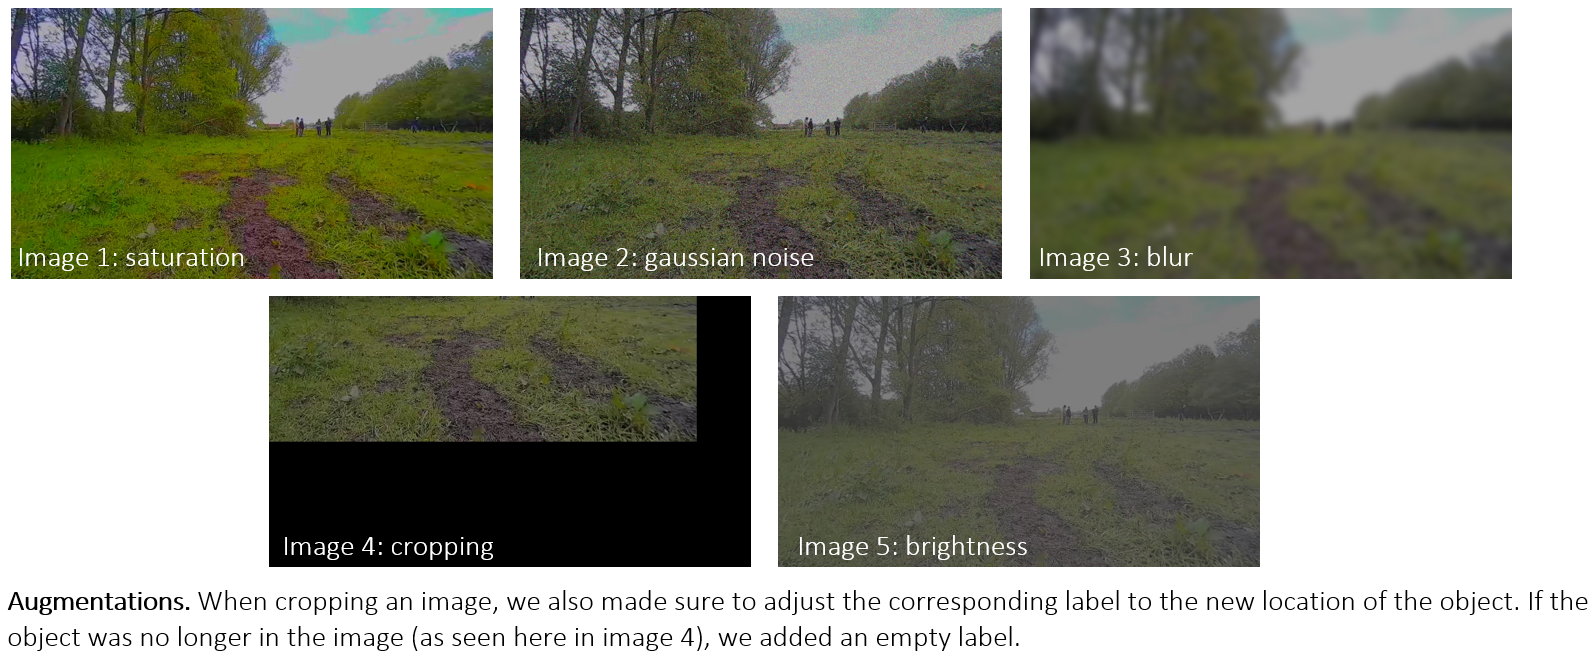

After all augmentations, we had:

Train data:
-  Total number of vehicles: 6429
-  Total number of people: 6582
-  Images with one vehicle: 2263
-  Images with one person: 2067
-  Images with several vehicles: 492
-  Images with several people: 531
-  Images with both vehicles and people: 1187
-  Images neither vehicles nor people: 88

Validate data:
-  Total number of vehicles: 779
-  Total number of people: 759
-  Images with one vehicle: 151
-  Images with one person: 136
-  Images with several vehicles: 80
-  Images with several people: 78
-  Images with both vehicles and people: 120
-  Images neither vehicles nor people: 15

Test data:
-  Total number of vehicles: 634
-  Total number of people: 512
-  Images with one vehicle: 148
-  Images with one person: 119
-  Images with several vehicles: 22
-  Images with several people: 28
-  Images with both vehicles and people: 130
-  Images neither vehicles nor people: 7

Note that the Test data was not augmented, because we want the test images to remain completely different from one another as the purpose of the test data is to evaluate the preformance of our model on new unseen data.

### More Data

Here is the code used for the augmentations we made to add data

In [ ]:
# Augmentation main.py file
import argparse
from utils.dataaugmentation import Data_Augmentation

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument(
        "-i", "--images", help="Folder that contains dataset images")
    parser.add_argument(
        "-l", "--labels", help="Folder that contains dataset labels")
    parser.add_argument(
        "-o", "--output", help="Folder where augmented data files are saved")
    parser.add_argument(
        "-n", "--nprocess", help="Number of new images that will be generated")
    args=parser.parse_args()
    data_augmentation = Data_Augmentation(args.output)
    data_augmentation.load_data(
        args.images, args.labels)
    data_augmentation.run(n_processing=int(args.nprocess))
    data_augmentation.save_data()


In [ ]:
# Data Augmentations

import cv2
import glob
import os
import random
import numpy as np
from skimage.util import random_noise
from PIL import Image, ImageEnhance, ImageFilter
# import pdb

class Data_Augmentation:

    def __init__(self, TARGET_FOLDER):
        self.dataset = []
        self.operations = []
        self.augmented_dataset = []
        self.TARGET_FOLDER = TARGET_FOLDER

    def load_data(self, IMAGE_FOLDER, LABEL_FOLDER):
        IMAGE_DIRS = glob.glob(os.path.join(IMAGE_FOLDER, "*"))
        # LABEL_DIRS = glob.glob(os.path.join(IMAGE_FOLDER,"*."+label_extension))
        for IMAGE_DIR in IMAGE_DIRS:
            data = {}
            img_name = IMAGE_DIR.split("\\")[-1].split(".")[0]
            if os.path.exists(os.path.join(LABEL_FOLDER, img_name+".txt")):
                data["image"] = cv2.cvtColor(cv2.imread(IMAGE_DIR),cv2.COLOR_BGR2RGB)
                data["bounding_boxes"] = self.load_label(
                    os.path.join(LABEL_FOLDER, img_name+".txt"))
            self.dataset.append(data)

    def load_label(self, DIR):
        labels = []
        with open(DIR) as f:
            for line in f:
                data_inline = line.split(" ")
                label = {
                    "class": int(data_inline[0]),
                    "x_center": float(data_inline[1]),
                    "y_center": float(data_inline[2]),
                    "width": float(data_inline[3]),
                    "height": float(data_inline[4][:-1])
                }
                labels.append(label)
        return labels

    def run(self, n_processing=2):
        operations = [
            self.noise,
            self.translation,
            self.contrast,
            self.saturation,
            self.gaussian_blur
        ]
        for data in self.dataset:
            self.augmented_dataset.append(data)
            for i in range(n_processing):
                operation = random.choice(operations)
                self.operations.append(operation)
                # pdb.set_trace()
                new_data = operation(data)
                self.augmented_dataset.append(new_data)

    def save_data(self):
        if (not os.path.exists(self.TARGET_FOLDER)):
            os.mkdir(self.TARGET_FOLDER)
            os.mkdir(os.path.join(self.TARGET_FOLDER, "images"))
            os.mkdir(os.path.join(self.TARGET_FOLDER, "labels"))

        IMAGE_FOLDER = os.path.join(self.TARGET_FOLDER, "images")
        LABELS_FOLDER = os.path.join(self.TARGET_FOLDER, "labels")
        print('Saving data to "./' + self.TARGET_FOLDER + '"...')

        for i, data in enumerate(self.augmented_dataset):
            cv2.imwrite(os.path.join(
                IMAGE_FOLDER, str(i)+".jpg"), cv2.cvtColor(data["image"],cv2.COLOR_RGB2BGR))
            self.save_bb(os.path.join(LABELS_FOLDER, str(
                i)+".txt"), data["bounding_boxes"])

    def save_bb(self, DIR_NAME, labels):
        with open(DIR_NAME, "w+") as f:
            for bb in labels:
                line = "{} {} {} {} {}\n".format(
                    bb["class"],
                    bb["x_center"],
                    bb["y_center"],
                    bb["width"],
                    bb["height"]
                )
                f.write(line)

    def noise(self, data):
        new_data = {}
        image = data["image"]
        gaussian_img = random_noise(image, mode="gaussian")
        # gaussian_img = cv2.addWeighted(image,0.75,0.25*random_noise,0.25,0)
        gaussian_img = np.array(255*gaussian_img, dtype="uint8")
        new_data["image"] = gaussian_img
        new_data["bounding_boxes"] = data["bounding_boxes"]
        return new_data

    def translation(self, data):
        x = np.random.uniform(-0.8, 0.8)
        y = np.random.uniform(-0.8, 0.8)
        image = data["image"]
        bbs = data["bounding_boxes"]
        new_data = {}
        # image generation
        y_abs = int(y*image.shape[0])
        x_abs = int(x*image.shape[1])
        M = np.float32([
            [1, 0, x_abs],
            [0, 1, y_abs]
        ])
        new_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
        # labels transformations
        new_bbs = []
        for bb in bbs:
            new_x = bb["x_center"]+x
            new_y = bb["y_center"]+y
            diff_x = 0
            diff_y = 0
            w = bb["width"]
            h = bb["height"]
            if new_x > 1:
                start_x = new_x-(bb["width"])/2
                if start_x > 1:
                    break
                w = 1-start_x
                diff_x = w/2
                new_x = 1
            if new_x < 0:
                start_x = new_x+(bb["width"])/2
                if start_x < 0:
                    break
                w = start_x
                diff_x = -w / 2
                new_x = 0
            if new_y > 1:
                start_y = new_y - (bb["height"]) / 2
                if start_y > 1:
                    break
                h = 1 - start_y
                diff_y = h / 2
                new_y = 1
            if new_y < 0:
                start_y = new_y + (bb["height"]) / 2
                if start_y < 0:
                    break
                h = start_y
                diff_y = -h / 2
                new_y = 0

            new_bb = {}
            new_bb["class"] = bb["class"]
            new_bb["x_center"] = new_x-diff_x
            new_bb["y_center"] = new_y-diff_y
            new_bb["width"] = w
            new_bb["height"] = h

            new_bbs.append(new_bb)

        new_data["image"] = new_image
        new_data["bounding_boxes"] = new_bbs

        return new_data

    def contrast(self, data):
        new_data = {}
        img = data["image"]
        img = Image.fromarray(img)
        enhancer = ImageEnhance.Contrast(img)
        new_image = enhancer.enhance(0.5)
        new_data["image"] = np.array(new_image)
        new_data["bounding_boxes"] = data["bounding_boxes"]
        return new_data

    def saturation(self, data):
        new_data = {}
        img = data["image"]
        img = Image.fromarray(img)
        enhancer = ImageEnhance.Color(img)
        new_image = enhancer.enhance(3)
        new_data["image"] = np.array(new_image)
        new_data["bounding_boxes"] = data["bounding_boxes"]

        return new_data

    def gaussian_blur(self, data):
        new_data = {}
        img = data["image"]
        img = Image.fromarray(img)
        new_image = img.filter(ImageFilter.GaussianBlur(9))
        new_data["image"] = np.array(new_image)
        new_data["bounding_boxes"] = data["bounding_boxes"]
        return new_data


### Data Balancing

Here is our code for the gaussian noise added for data balancing. 

In [ ]:
from PIL import Image
import random
import os
import shutil


def multiple_items(folder):
  # Returns file names for files with multiple men or vehicles, but not both.
    men_files = []
    cars_files = []

    for filename in os.listdir(folder):
        if filename.endswith(".txt"):
            with open(os.path.join(folder, filename), 'r') as f:
                men_in_file = 0
                cars_in_file = 0
                for line in f:
                    if line.startswith('0'):
                        cars_in_file += 1
                    elif line.startswith('1'):
                        men_in_file += 1
                if men_in_file > 1 and cars_in_file == 0:
                    men_files.append(os.path.splitext(filename)[0])
                if cars_in_file > 1 and men_in_file == 0:
                    cars_files.append(os.path.splitext(filename)[0])

    return cars_files + men_files

def add_noise(multi, file_path, text_path, counter):
  # Adds noise to the given photos and rename them
    for file_name in multi:
        full_path = file_path + '/' + file_name + '.jpg'
        im = Image.open(full_path)

        # add random noise to 1/10 of the picture
        for i in range((im.size[0]*im.size[1]//10)):
            im.putpixel((random.randint(0, im.size[0]-1), random.randint(0, im.size[1]-1)),
                        (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))

        # Save the noisy image
        im.save(file_path + '/' + str(counter) + '.jpg')
        shutil.copyfile(text_path+'/'+file_name+'.txt', text_path + '/' + str(counter) + '.txt')
        counter += 1
    return counter

if __name__ == '__main__':
    counter = 6000

    # Add noise to train images with multiple items of the same type:
    print('Train data:')
    multi_train = multiple_items('/content/gdrive/MyDrive/yolov7/CarsMansReadyForYoloAug/train/labels')
    file_path_train = '/content/gdrive/MyDrive/yolov7/CarsMansReadyForYoloAug/train/images'
    text_path_train = '/content/gdrive/MyDrive/yolov7/CarsMansReadyForYoloAug/train/labels'
    counter = add_noise(multi_train, file_path_train, text_path_train, counter)

    # val data
    #Add noise to validate images with multiple items of the same type:
    print('Val data:')
    multi_val = multiple_items('/content/gdrive/MyDrive/yolov7/CarsMansReadyForYoloAug/val2/labels')
    file_path_val = '/content/gdrive/MyDrive/yolov7/CarsMansReadyForYoloAug/val2/images'
    text_path_val = '/content/gdrive/MyDrive/yolov7/CarsMansReadyForYoloAug/val2/labels'
    counter = add_noise(multi_val, file_path_val, text_path_val, counter)

    # test data
    #Add noise to validate images with multiple items of the same type:
    print('Test data:')
    multi_test = multiple_items('/content/gdrive/MyDrive/yolov7/CarsMansReadyForYoloAug/test/labels')
    file_path_test = '/content/gdrive/MyDrive/yolov7/CarsMansReadyForYoloAug/test/images'
    text_path_test = '/content/gdrive/MyDrive/yolov7/CarsMansReadyForYoloAug/test/labels'
    counter = add_noise(multi_test, file_path_test, text_path_test, counter)



### In this section we retrieve the Data:

In [ ]:
%cd /content/gdrive/MyDrive/yolov7

import os

dataset = os.listdir('/content/gdrive/MyDrive/yolov7/CarsMansReadyForYoloAug')


In [ ]:
from PIL import Image
import shutil


# add the empty images to the train, valid and test
def copy_empty_images(img_num, source_path, save_path, shift):
  for i in range(img_num):
    img = Image.open(source_path + '/images/' + str(shift + i+1) + '.jpeg')
    img.save(save_path + '/images/' + str(shift + i+1) + '.jpg')
    shutil.copyfile(source_path + '/labels/' + str(shift + i+1) + '.txt', save_path + '/labels/' + str(shift + i+1) + '.txt')

empty_images_path= '/content/gdrive/MyDrive/empty_images'

# train images
file_path_train = '/content/gdrive/MyDrive/yolov7/Elbit_data2/CarsMansReadyForYolo/train'
copy_empty_images(55, empty_images_path, file_path_train, shift = 5000)

# val images
file_path_val = '/content/gdrive/MyDrive/yolov7/Elbit_data2/CarsMansReadyForYolo/val2'
copy_empty_images(7, empty_images_path, file_path_val, shift = 5055)

# test images
file_path_test = '/content/gdrive/MyDrive/yolov7/Elbit_data2/CarsMansReadyForYolo/test'
copy_empty_images(7, empty_images_path, file_path_test, shift = 5062)


## Network & Training

The YOLOv7 model is based on the following backbone architecture, with additions and adjustments for each version of YOLOv7 model.

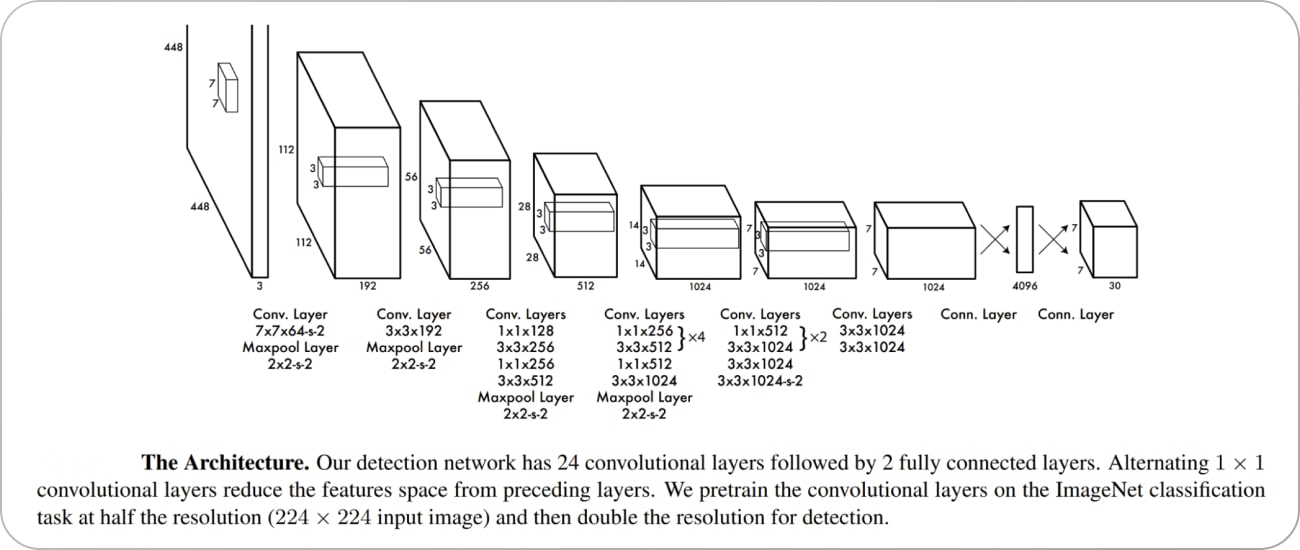

The model's first 20 convolution layers are pre-trained using ImageNet by employing a temporary average pooling and fully connected layer. The pre-trained model is then converted for detection, as previous research has demonstrated that adding convolution and connected layers to a pre-trained network enhances performance. YOLO's final fully connected layer predicts both class probabilities and bounding box coordinates.

As mention before, to detect objects, YOLO divides an input image into an S × S grid, with each grid cell responsible for detecting an object whose center falls within its bounds. Each grid cell predicts B bounding boxes and corresponding confidence scores that reflect the model's confidence in whether the box contains an object and the predicted box's accuracy.

During training, only one bounding box predictor is assigned responsibility for each object. YOLO assigns this responsibility based on the highest Intersection over Union (IoU - will be explained more later) between the prediction and the ground truth, leading to specialization between the predictors. This allows each predictor to improve forecasting for certain object sizes, aspect ratios, or classes, ultimately enhancing the overall recall score.

YOLO models employ a key technique called non-maximum suppression (NMS) to improve accuracy and efficiency in object detection. NMS is a post-processing step that removes redundant or incorrect bounding boxes, generating a single bounding box for each object in the image. Since multiple bounding boxes may be generated for a single object, and they may overlap or be located at different positions, NMS is a crucial step in improving the accuracy of the model.

There are several YOLOv7 model versions, which are ment to work on different devices:
* YOLOv7-Tiny, YOLOv7, and YOLOv7-W6 are meant for edge GPU, normal (consumer) GPU, and cloud GPU, respectively.
* YOLOv7-E6 and YOLOv7-D6, and YOLOv7-E6E are also meant for high-end cloud GPUs only.

Here we choose our YOLOv7 version.

In this project we trained mostly the regular YOLOv7 model, and ran a couple of attempts with YOLOv7-E6E. YOLOv7-E6E has the ability to increase the data by adding more data augmentation, and performing on-gpu optimizations, while training the model. Therefore, training this model takes longer than training the regular YOLOv7 model. However, the E6E model was in no significant way better than regular YOLOv7. This makes sense because we had limited GPU power that could not take full advantage of the E6E capabilities.

A summary of the models we run, according to the output generated by the model:

Regular YOLOv7 version model summary: 314 layers, 36,487,166 parameters, and the initial learning rate (lr0) is 0.01, and the final OneCycleLR learning rate (lrf) is 0.1.

YOLOv7-E6E version model summary: 819 layers, 164,835,452 parameters.



**Learning rate scheduling**

When training neural networks, we often wish to adjust the value of our learning rate during training, instead of using a fixed learning rate. This is done using a learning rate scheduler. While there are many popular schedules, the YOLO-v7 authors optimize the models for a cosine learning rate schedule — with a linear warmup at the start of training. This has the following shape:


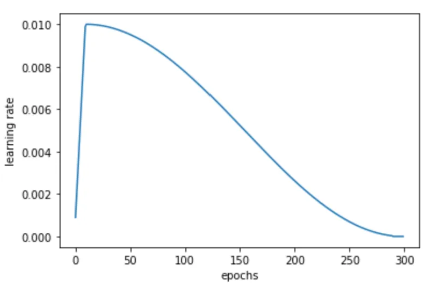

As we can see from the plot, the learning rate is changing throughout the epochs, periodically. The period includes linear warmup, and cooldown — where the learning rate is held at its minimum value.

For our model’s learning rate adjustments we have many optional parameters - initial learning rate (lr0),  final OneCycleLR learning rate (lrf),  k-decay argument (adjust how aggressive the annealing of the curve is), number of epochs needed for warm up,  type of reducing curve after warm up (cosine by default) and many more. 
The learning rate starts as lr = lr0 x lrf, increases to lr = lr0 on a steep incline (the warmup), and decrease as a cosine curve back to lr = lr0 x lrf. 

We chose to change the initial learning rate on our model trains as the initial learning rate seems to be a main parameter in the learning rate adjustments, especially when looking at the epochs number we could achieve using the google colab limited resources.


**Optimizer**

YOLO-v7 uses <u>SGD</u> optimizer by default, and can be adjusted to train using <u>adam</u> optimizer.

<u>Stochastic Gradient Descent</u> (SGD) is a simple and widely used optimization algorithm that updates the weights of a neural network in the direction of the negative gradient of the loss function. It works by computing the gradient of the loss function with respect to the model parameters (i.e., the weights), and then adjusting the weights by subtracting the gradient multiplied by the learning rate. The learning rate determines the step size for the updates and can be set manually or adjusted automatically using a learning rate scheduler. One of the advantages of SGD is that it is relatively easy to implement and can work well on a wide range of deep learning problems. However, it can be sensitive to the choice of learning rate and may get stuck in local optima if the loss landscape is not well-behaved.

Attached below the SGD optimization algorithm.

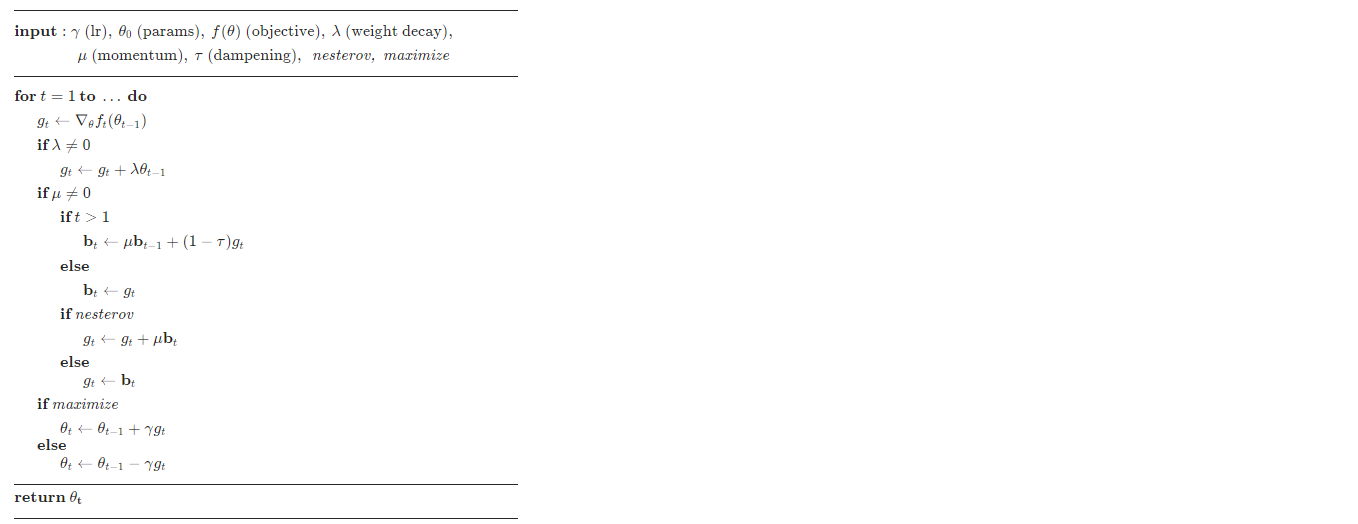

<u>Adam</u> is a more advanced optimization algorithm that builds on top of SGD and uses an adaptive learning rate. Instead of using a fixed learning rate, Adam adjusts the learning rate for each weight based on estimates of the first and second moments of the gradient. This allows Adam to automatically adapt the learning rate to the geometry of the loss landscape and helps it to converge faster and more reliably than SGD. Adam is particularly well-suited for deep learning problems with large datasets and complex loss landscapes. However, it may not perform as well on simple problems or if the hyperparameters are not tuned correctly.

Adam optimization algorithm is attached below.

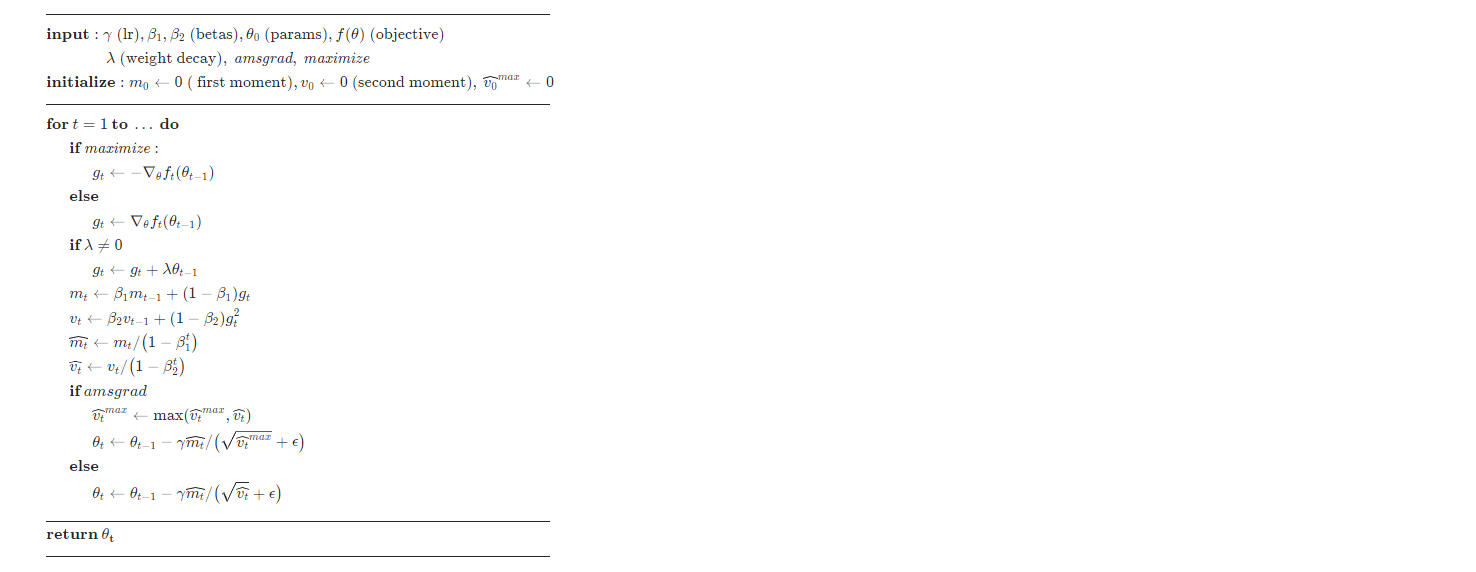

**Loss Function**


The new loss function used in YOLO-v7 is called <u>Focal loss</u>, and it aims to address the class imbalance problem that arises in object detection tasks. <u>Focal Loss</u> is an improved version of Cross-Entropy Loss that tries to handle the following class imbalance problem.
 
In many object detection methods, including previous versions of YOLO, the majority of candidate locations evaluated by the model are background objects, which leads to a class imbalance issue. This can cause inefficiencies in training, as well as a degradation of the model's performance, as the gradients computed by the loss function can be overwhelmed by the large number of easy negatives.

Focal loss addresses this issue by assigning more weight to hard or easily misclassified examples and down-weighting easy examples. In other words, the loss contribution from easy examples is reduced, and the importance of correcting misclassified examples is increased. This is achieved by modifying the standard cross-entropy loss function, which is known to be less effective at detecting small objects, with a focal term that down-weights the loss for well-classified examples.

This new loss function is a significant improvement over the previous cross-entropy loss used in YOLO, as it enables the model to focus on hard examples, which are the objects that are hard to detect. By doing so, the model can improve its ability to detect small objects and achieve a higher accuracy overall. In combination with a higher resolution of 608x608 pixels, the change of the loss function caused YOLO-v7 detect smaller objects, providing a more accurate and efficient object detection system.

Attached below cumulative distribution functions of the normalized loss for positive and negative samples for different values of γ for a converged
model. The effect of changing γ on the distribution of the loss for positive examples is minor. For negatives, however, increasing γ heavily
concentrates the loss on hard examples, focusing nearly all attention away from easy negatives.

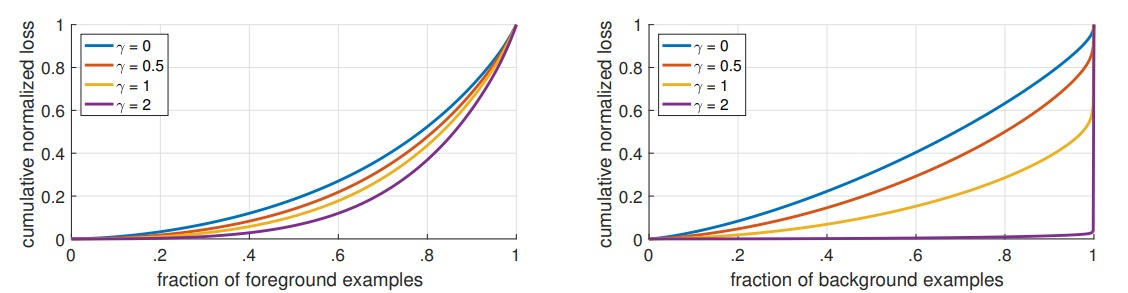

## Our Training

We optimized the initial learning rate, batch size and number of epochs for our runs. The Google Colab resources were our main obstacle in training the model, since the model has many layers and parameters and our dataset is a large set of big images. 

Training time was very long and attempts with over a batch size of 16 failed repeatedly. Consequentially our largest number of epochs was 70, and largest batch size 16.

In [ ]:
# acquire the specific model we need to train 

%%bash
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7x.pt
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6.pt
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6.pt
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-d6.pt
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6e.pt

### Train the Model


In [ ]:
# This section is used to choose the batch size, epochs number, 
# and configuration file for hyperparameters.
# Also we can initiate the yolov7 model (regular, e6e, etc...) 

# For this run we used yolov7 regular model 

%cd /content/gdrive/MyDrive/yolov7
!python train.py --batch 8 --cfg cfg/training/yolov7.yaml --epochs 30 --data Elbit_data2/data2.yaml --weights 'yolov7.pt' --device 0 --hyp data/hyp.scratch.p5.yaml

In [ ]:
# For this run we used yolov7-e6e model

%cd /content/gdrive/MyDrive/yolov7
!python train_aux.py --batch 8 --cfg cfg/training/yolov7-e6e.yaml --epochs 50 --data Elbit_data2/data2.yaml --weights 'yolov7-e6e.pt' --device 0

## Benchmark & Evalutation of the Model

Our main method of evaluating the model is the <u>confution matrix</u>, chosen at 0.1 confidence.
 We also examined the <u>F1-curve</u>, <u>R curve</u>, <u>P curve</u>, and <u>PR curve</u> for some of the runs, just to get an understanding of those evaluation metrics. They are all base on two main parameters - <u>precision</u> and <u>recall</u>. Here we will explain what the parameters mean, and afterwards we will discuss how we chose our main methods of evaluation.

**Precision and Recall**

The <u>precision</u> of a class is defined as the fraction of true positive predictions among all predicted samples for that class at a given threshold.  
The <u>recall</u> of a class is defined as the fraction of true positive predictions among all actual positive samples for that class at a given threshold.

These parameters are important for understanding the performance of a classification model, and are widely used in all of the evaluation methods we used to evaluate our model.

**P Curve**

The P curve, or Precision-Confidence curve, shows how the precision of the model varies as a function of the decision threshold, or confidence level, used to assign class labels to samples.The P curve plots the precision of each class on the y-axis, and the confidence level on the x-axis. It allows users to visualize how the precision of the model changes as the decision threshold is varied, and to select an appropriate threshold that balances the trade-off between precision and recall based on their specific needs.

**R Curve**

Similar to the P-Curve, the R-curve shows the Recall value to level of confidence.

**P-R Curve**

The PR curve shows how the precision of the model varies as the recall is changed by adjusting the decision threshold, or confidence level, used to assign class labels to samples.  The PR curve plots the precision on the y-axis and the recall on the x-axis, allowing users to visualize the trade-off between precision and recall as the decision threshold is varied. A good classifier will have high precision and high recall, resulting in a curve that is close to the top right corner of the plot. It is a useful tool for selecting an appropriate threshold that balances the trade-off between precision and recall based on the specific needs of the user.

When talking about P-R curves we should also address the  <u>mAP score</u>, since all the values on the P-R curve are stated for mAP@.5. Mean Average Precision (mAP) is a common metric used to evaluate the performance of object detection models. It measures the average precision of the model across different levels of confidence threshold and Intersection over Union (IoU) threshold.

<u>IoU</u> is a common metric used to evaluate the performance of object detection. IoU measures the overlap between a predicted bounding box and a ground truth bounding box for a given object in an image. The IoU is calculated as the ratio between the area of intersection and the area of union between the predicted bounding box and the ground truth bounding box. A higher IoU indicates better performance, and IoU is used as a threshold to determine if a prediction is correct or not.

mAP@.5 measures the mean average precision of the model when the IoU threshold is fixed at 0.5.


**F1-score and F1-curve**

F1-score is an essential metric in evaluating the performance of a detection model. In our case, a vehicle and people detection system. It is extreamly useful where detecting a false positive (i.e., detecting a vehicle or person that is not actually present) is undesirable, but not detecting a true positive (i.e., failing to detect a vehicle or person that is in the radar) is even more catastrophic. In such scenarios, precision and recall become crucial performance measures. 

The F1-score balances the trade-off between precision and recall by computing their harmonic mean, making it an ideal metric for assessing the performance of a vehicle and people detection system. In this context, it is important to have a high recall, ensuring that all vehicles and people in the radar are detected, while also having a high precision, to minimize false detections. The F1-score provides a single, composite score that reflects the overall performance of the system and helps in making informed decisions about the design and implementation of the system.


**Confusion matrix**

The confusion matrix is a commonly used tool to evaluate the performance of a multi-class classification model. In a 2-class classification model, like our model, the confusion matrix is a 3x3 table that displays 9 entries: true positive (TP) and false positive (FP) for both classes, false negative (FN) for both classes, and true negative (TN). The entries in the matrix represent the number of correct and incorrect predictions made by the model.

The confusion matrix provides a clear and concise overview of the model's performance and helps to identify its strengths and weaknesses. It allows one to compare the model's predictions to the actual outcomes, and to evaluate how well the model is able to distinguish between the two classes. This information can be used to make informed decisions about the design and implementation of the model, and to compare the performance of different models and select the best one for a given problem. In cases where the cost of false positive and false negative predictions is not equal for each class, the confusion matrix is especially useful for determining the optimal trade-off between precision and recall.


**Why Focus on Confusion Matrix**

As we noted before, we aim to defend against attacks on the model that create False Negative feedback. This is why we want to maximize our True Positive predictions and minimize False Negative, and False Positive predictions won't be our main focus. This is also why we chose a relatively small fixed confidence to be our benchmark in all the tests, at 0.1. We want as many predictions as possible to be made by the model, even if they turn out to be falsely made.

As explained above, the F1 and PR curves take into account both FN and FP predictions and weigh them evenly, and the Percision Curve measures the rate between True to False Positive. While they are all good measurments to how "good" a model is, they miss our aim in this project. We view the F1 curve in all our run attempts as a sum-up of the run, and to make sure our results are not catastriphically inaccurate.

The R Curve is also a good measurment for us, because it concerns the rate between True Positive to False Negative. However the X-axis of the curve is the level of confidence, so we simply used the R Curve to decide on using 0.1 confidence and didn't need to further refer to it.

In conclusion, the confusion matrix is the most important method for us because for a fixed confidence the columns (True positive to False Negative) sum up to one, so we can easily focus only on the important predictions for our purpose (FN and TP at 0.1 confidence).



When detecting the photos using our trained model, we can use the confidence that we obtained from the evaluation metrics discussed above to gain the best performance.

In [ ]:
# here we evaluate our trained model performances

%cd /content/gdrive/MyDrive/yolov7
!python test.py --weights /content/gdrive/MyDrive/yolov7/runs/train/exp91/weights/last.pt --conf 0.1 --data Elbit_data2/data2.yaml --task test --name data_name


In [ ]:
# detect and draw bounding box for all test photos

!python detect.py --weights /content/gdrive/MyDrive/yolov7/runs/train/exp75/weights/best.pt --conf 0.1 --source /content/gdrive/MyDrive/yolov7/Elbit_data2/CarsMansReadyForYolo/test/images

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/gdrive/MyDrive/yolov7/runs/detect/exp6/*.jpg'):
    #Assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1

## Results

### Our training runs:
We ran the model a total of 10 runs, with different parameters:

- **<u>Benchmark:</u>** Before we made any changes and augmentations we ran the "vanilla" YOLOv7 model with 30 epochs, batch size of 8, and initial learning rate 0.01. This test served as our benchmark for future attempts at perfecting our model. Below are the complete results for this test. We also wished to see better results than a benchmark we got from Elbit. They produced with better GPU 83% detection for vehicles, and 84% detection for men.

 <u>Deep dive:</u> In the confusion matrix we see 79% prediction accuracy for vehicles and 85% accuracy for men. We can also take this opportunity to examine the other measurments matrices:

 - Percision Curve starts low and increases as we get to higher confidences. This is because we measure True Positive to total positive predictions, which is bound to be a closer value to 1 as the confidence increases.
 - Recall Curve is almost a mirror view of the P-Curve, because when the confidence is lower we "miss" less opportunities to recall an object, so the False Negative level is lower.
 - P-R Curve shows exactly the contrast above, when P-level is high R-level is low (as reflection to their respective reactions to the confidence).
 - F1 is the harmonic mean of P and R curves, so when each of those graphs are at 0 the F1 will be set to 0 as well. It also gives us a notion of what should be the "best" confidence threshold to use, in this case 0.444.

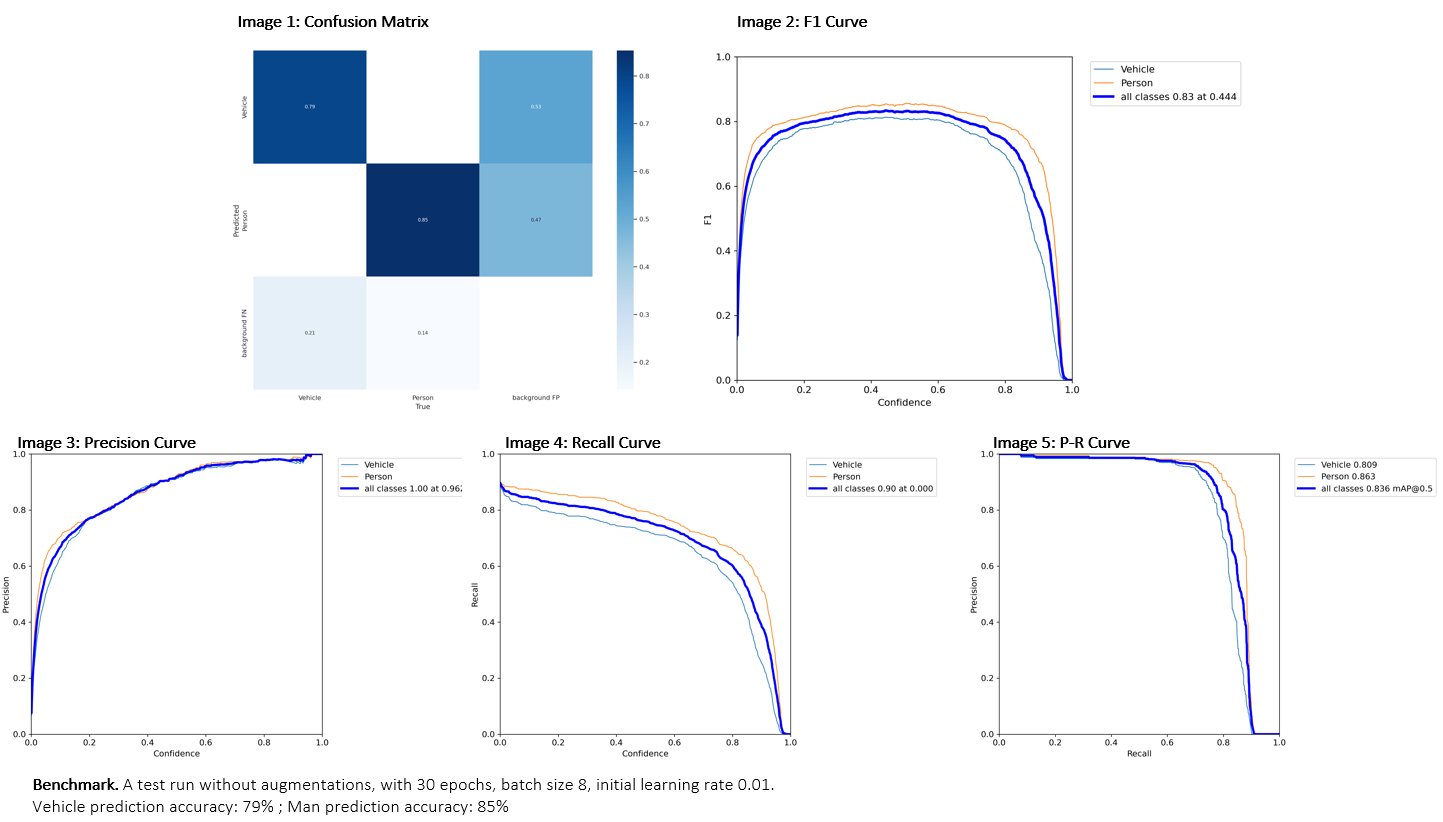

- **<u>Initial Learning Rate Adjustment:</u>** After adding our augmented data, we ran 4 tests to adjust our initial learning rate. All with the same number of epochs (30) and same batch size (8). As we explained earlier, the LR is set at an initial value and is adjusted during the model train.

   Our tests were conducted with learning rates of 0.002, 0.01, 0.05 and 0.3. The best of which was with the pre-defined 0.01 initial LR, so our next runs were all made with that parameter. This is also a logical conclusion, since the initial hyperparameters were deliberately chosen to work best with most datasets.

  We were glad to see that with augmentations we produced better results than our benchmark, even with the same learning rate.

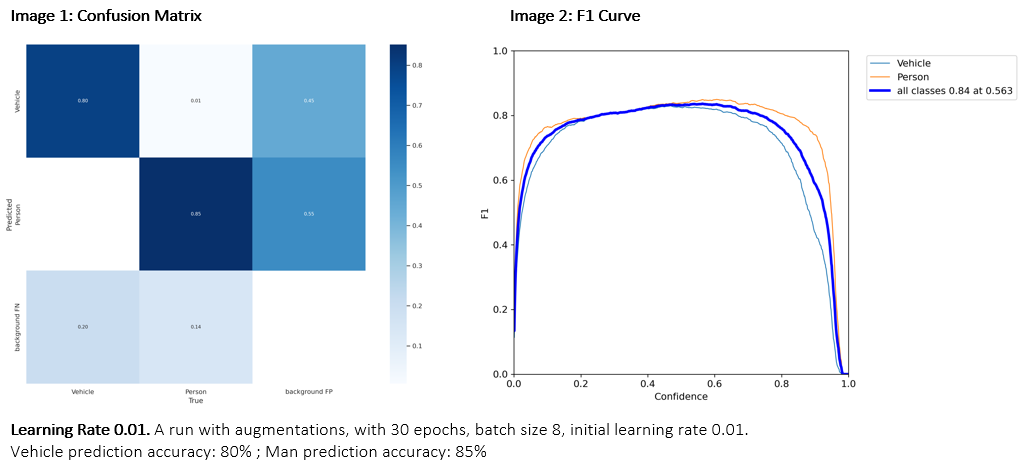

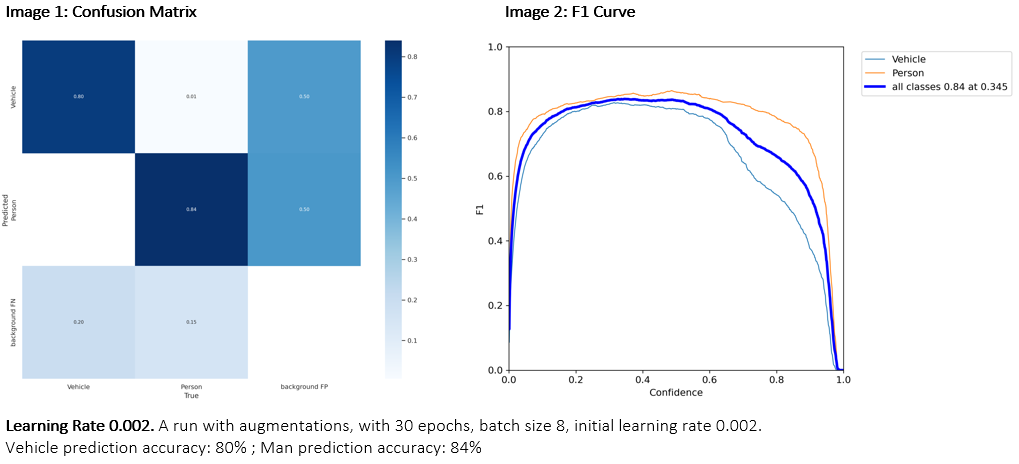

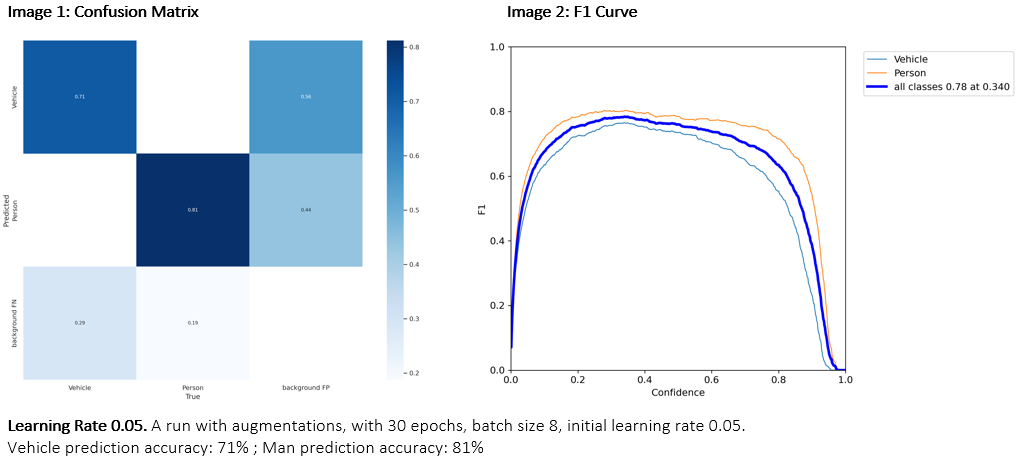

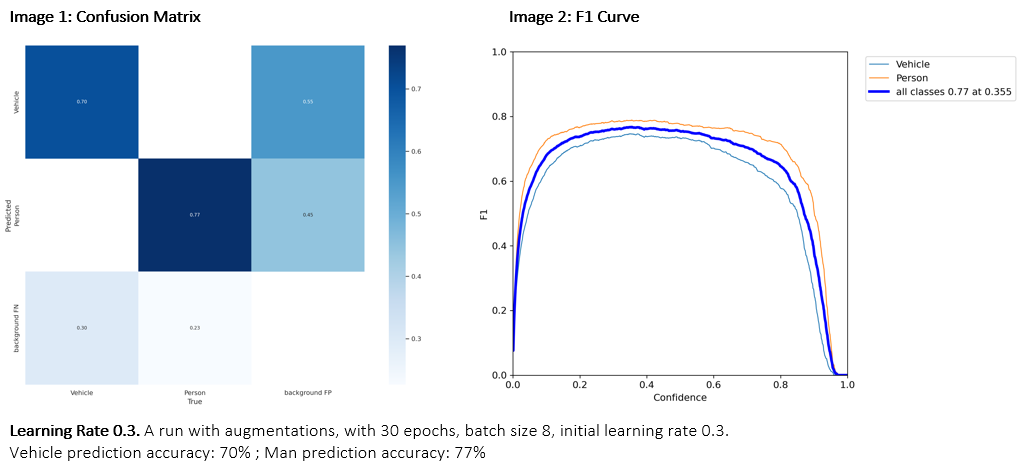

- **<u>YOLOv7 E6E:</u>** We wanted to see if the E6E model will produce better results than regular YOLOv7 with the same GPU. For this we ran 2 YOLOv7 E6E tests, one with 10 epochs and another with 50, both with batch size of 8. The results were actually worse than regular YOLOv7. This is because our optimization process was made for regular YOLOv7 while the E6E is an entirely different model that needs different optimizations. For example, while both are pre-defined with an initial LR of 0.01, the final LR of YOLOv7 is 0.1, and for YOLOv7 E6E it's 0.2.

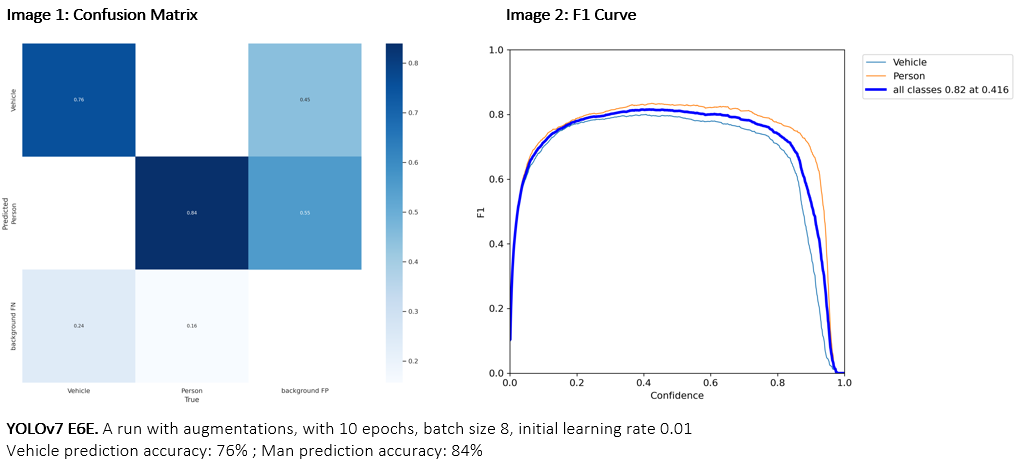

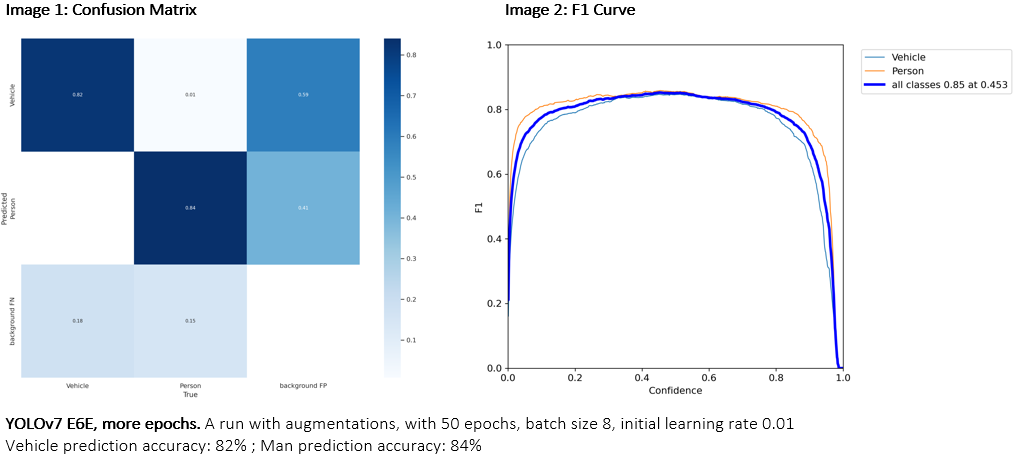

- **<u>Larger Batches:</u>** We now ran the model with 16 batch size with our augmentations and 30 epochs. The larger batch size run was, as expected, better.

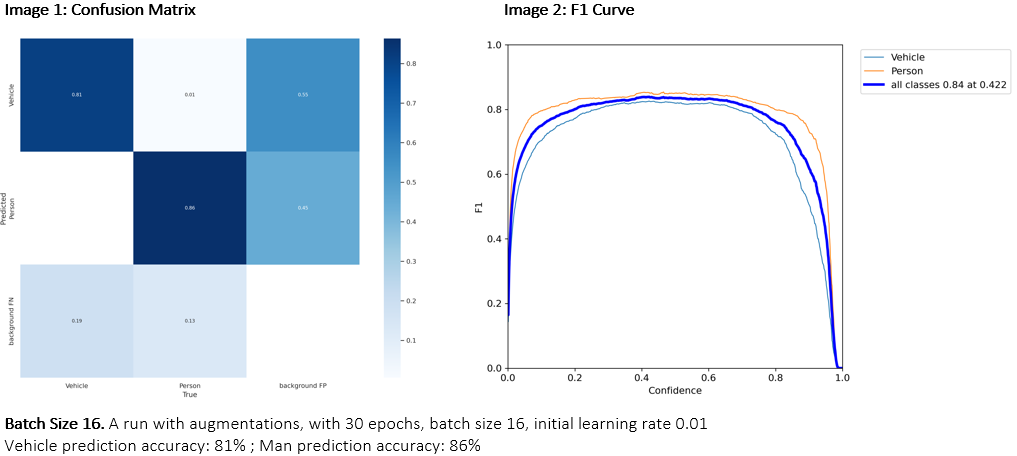

- **<u>More Epochs:</u>** Finally, we tested the model with augmentations, batch size of 16 and tried 50 and 70 epochs. We managed to produce best results with 70 epochs, as can be seen below.

 When compering the results, we addressed the average precentage of True Positive, hence the run with 70 epochs (84.5% success) is better than the run with the 50 epochs (84%). In addidtion, we would like to get balanced results for both classes detection. 

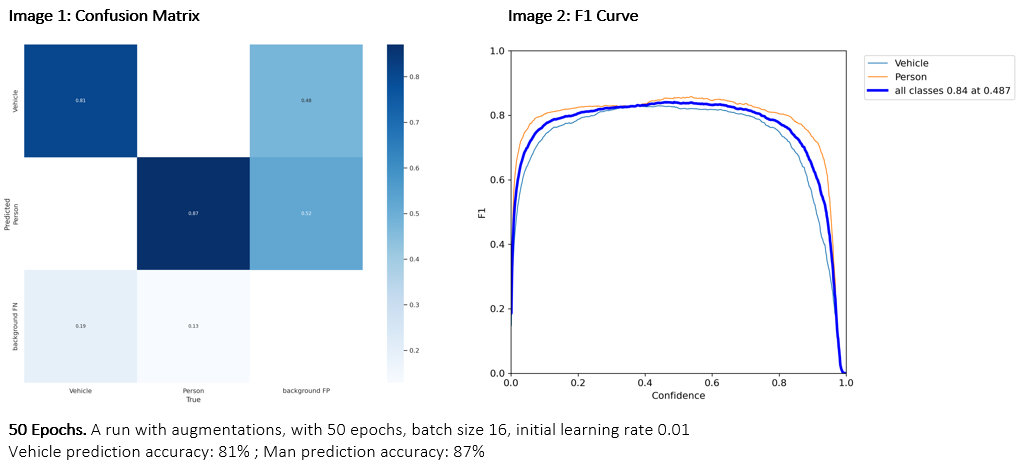

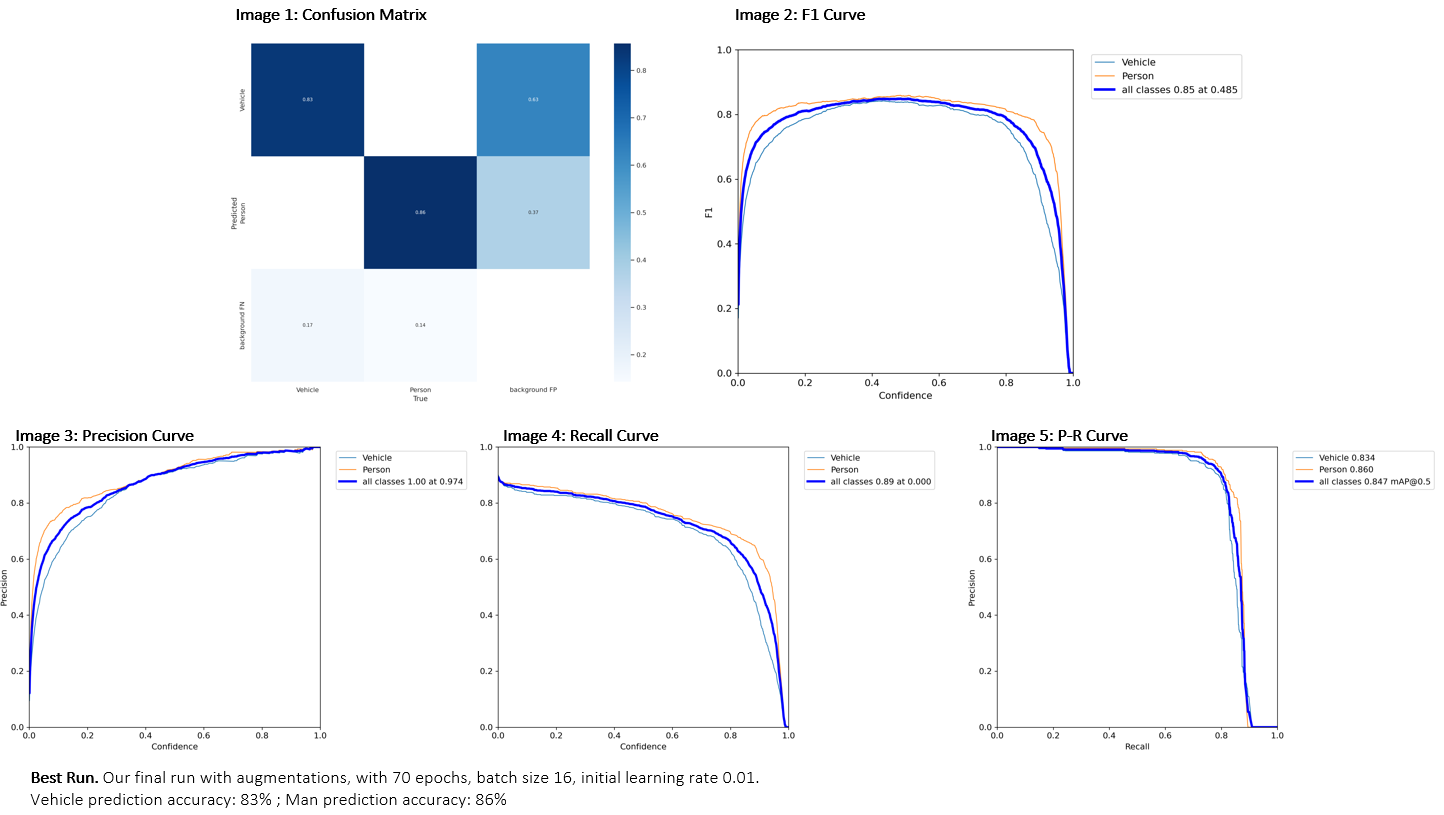

### Some prediction examples:

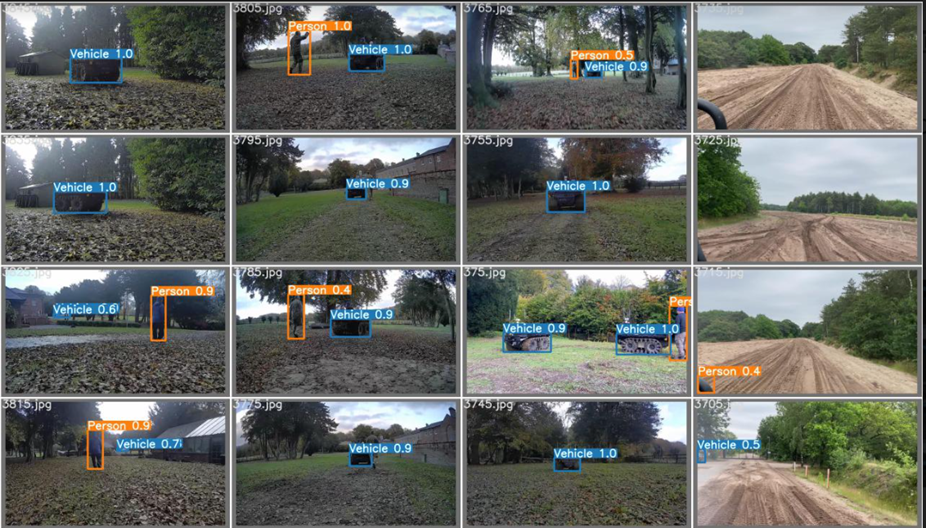

## Result Analysis & Conclusion

We show in our results how we refined the model. We augmented the data to add new images, improved the learning rate and surpassed the benchmark we defined. 

We can see that with optimal LR, and with bigger batch size and number of epochs we produced better results. This leads to a conclusion that we are on the right path to finding the optimal hyperparameters. We believe even more epochs and larger batches would have yielded in better results, but did not have a strong enough GPU or enough memory to train such a big model with so many parameters, especially given the high resolution of our images.

We can see that the data augmentation we added improved our training, and we infer that the bigger dataset allowed better percision and improved our model.

There may even be potential for further hyperparameter tuning to improve the model's accuracy. For instance, the number of convolutional layers, and the activation functions, can be experimented with to optimize the performance of the model. This, however, requires computational resources we do not possess. Even tuning the initial learning rate parameter took a lot of time and resources, where each run of YOLOv7 with 30 epochs took around 3 days of work with Google Colab. The E6E runs and those with more epochs were even longer.

This project could also have taken a completely different approach, if we had not prioritized the True Positive to False Negative rate. For example had we prioritized the Percision Curve to minimize False Positive predictions, we'd get different results and have different focus (perhaps have greater focus on the confidence threshold).

We also recently heard of the new YOLOv8 model (released January 2023). It could be a fun experiment to test our results comapred to the brand-new state of the art, but to date there are no good benchmarks for us to compare to.

Overall, the results of the project demonstrate the potential of the YOLOv7 model in object detection, and the importance of selecting appropriate hyperparameters for optimal performance. We learned a lot from this project about the YOLOv7 model and object detection models in general, and hope we reached satisfying results.


## References
1.   https://learnopencv.com/yolov7-object-detection-paper-explanation-and-inference/
2.   https://viso.ai/deep-learning/object-detection/
3. https://www.baeldung.com/cs/yolo-algorithm
4. https://towardsdatascience.com/yolo-you-only-look-once-real-time-object-detection-explained-492dc9230006
5. https://www.youtube.com/watch?v=TuiScGjsw1w
6. https://github.com/MinoruHenrique/data_augmentation_yolov7
7. https://arxiv.org/abs/1708.02002v2
8. https://www.v7labs.com/blog/yolo-object-detection
9. https://arxiv.org/pdf/2004.05909.pdf
10. https://towardsdatascience.com/yolov7-a-deep-dive-into-the-current-state-of-the-art-for-object-detection-ce3ffedeeaeb#6764
11. https://arxiv.org/abs/2207.02696
12. https://github.com/WongKinYiu/yolov7
13. https://pytorch.org/docs/stable/generated/torch.optim.SGD.html
14. https://pytorch.org/docs/stable/generated/torch.optim.Adam.html
